# Forest Fire Model

Make it possible to set the probability parameters p, f, q. Start with an empty field (all cells
are in state Ashes).
Write the number of cells for each state (Ashes, Tree, Fire) for each time step into a file
(three values per line, ASCII format, separated by blanks).

q - rate of induced growth\
f - rate of spontaneous fire\
p - rate of spontaneous growth

In [7]:
import numpy as np

In [8]:
q = 0.1 #1 - induced growth. 
f = 0.01
p = .5

In [9]:
nx, ny = (10, 10)
# automaton = np.zeros((num_rows, num_cols))
iterations = 20
neighbourhood = ((-1,0), (0,-1), (0, 1), (1,0))

### Auxilary functions

In [10]:
def process_singular_cell(cell):
    if cell == 0:
        return np.random.choice([0, 1], p = [1-p, p]) #creation of forest cell with a probability of p
    elif cell == 1:
        return np.random.choice([1, 2], p = [1-f, f]) #spreading fire with a probability of f
    elif cell == 2: 
        return 0 #cell that burned turned to ashes.
    else:
        return cell

In [11]:
print(np.random.choice([0, 1], p = [1-p, p]))

0


In [12]:
def process_cell_neighbourhood(cell, neighbourhood_cell):
    if cell == 0:
        if neighbourhood_cell == 1:
            return np.random.choice([0, 1], p = [1-q, q])
        else:
            return 0
    elif cell == 1:
        if neighbourhood_cell == 2:
            return 2
        else:
            return 1
    else:
        return cell #somehow this saves the program


In [13]:
def colored_string(numbers):
    color_map = {"0": "\033[0;33m", "1": "\033[32m", "2": "\033[31m"}
    colored_str = ""
    for n in numbers:
        if str(n) in color_map:
            colored_str += color_map[str(n)] + str(n) + "\033[0m"
        else:
            colored_str += str(n)
    return colored_str

In [14]:
print(colored_string([1,0,1]))

101


In [16]:
def print_automaton(automaton):
    for row in automaton:
        for column in row:
            print(str(row))
    

In [17]:
def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((nx, ny))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == 0 and np.random.random() <= p:
                X1[iy,ix] = 1
            if X[iy,ix] == 1:
                X1[iy,ix] = 1
                for dx,dy in neighbourhood:
                    if X[iy+dy,ix+dx] == 2:
                        X1[iy,ix] = 2
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = 2
    return X1

Let 0 be ashes (yellow), 1 - forest (green) and 2 - fire (red)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import animation
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)
forest_fraction = 0.2

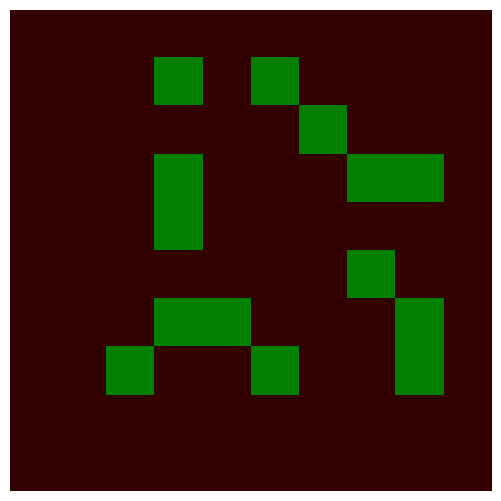

In [35]:
# running = True
# iters = 0
# new_automaton = automaton
# with open("gowno.txt", "w") as file:
#     while running:
#         iters+=1
#         for row_id, rows in enumerate(automaton):
#             for column_id, cell in enumerate(rows):
        
#         if iters == iterations:
#             running = False
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval, frames=200)


In [26]:
from IPython.display import HTML
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available